In [1]:
import numpy as np
import astropy.units as u
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from deproject import deproject, get_galaxy_specs
from astropy.coordinates import SkyCoord

from deproject import deproject, get_galaxy_specs

In [2]:
galaxy = 'NGC1300'
RA, DEC, POSANG, INCL, DIST = get_galaxy_specs(galaxy) # DIST [Mpc]

In [9]:
hdu_galx = fits.open('/home/austin/PHANGS/ngc1300/'+galaxy.lower()+'_w4_mjysr.fits')[0]

wcs_galx = WCS(hdu_galx.header)
wcs_galx.sip = None

deproj_img = deproject(center_coord=(RA*u.deg, DEC*u.deg), incl=INCL*u.deg, pa=POSANG*u.deg,
                           header=hdu_galx.header, wcs=None, naxis=None, ra=None, dec=None,
                           return_offset=False)
r_deg = deproj_img[0]
r_pc = r_deg * (np.pi / 180) * (DIST * 1e6) # in pc
# data = hdu_galx.data.flatten() * np.cos(INCL*np.pi/180)
# radii = r_pc.flatten()

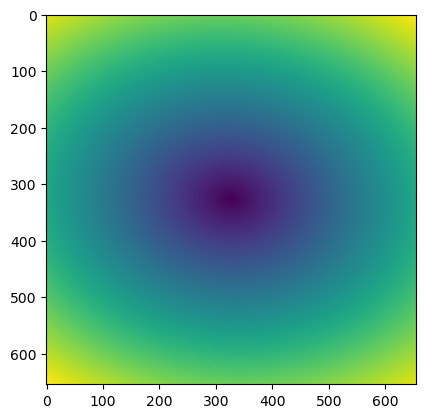

In [4]:
plt.imshow(r_pc)

## Incorporate the code provided to do the following:
### 1. Remake the figure above (radial distance in pc) using the WCS from the galaxy file header, similar and add axis labels and a color bar for radial distance (refer to `Fits_Image_Imshow.ipynb` for making images)
### 2. Make a mask (using logic statements and array slicing) in radius: Only display parts of the image where $R>5 kpc$.
### 3. Make a mask in intensity: Only display parts of the image where $I<1 MJy/sr$.

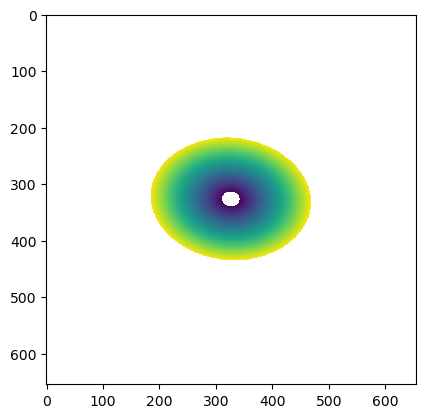

In [5]:
mask = (r_pc > 5*1e3) & (r_pc < 50*1e3)
# Mask between 5 and 100 kiloparsecs, can also be written as &= for the 2nd one, you can also use the | for "or"
masked = r_pc
masked[~mask] = np.nan
plt.imshow(masked)

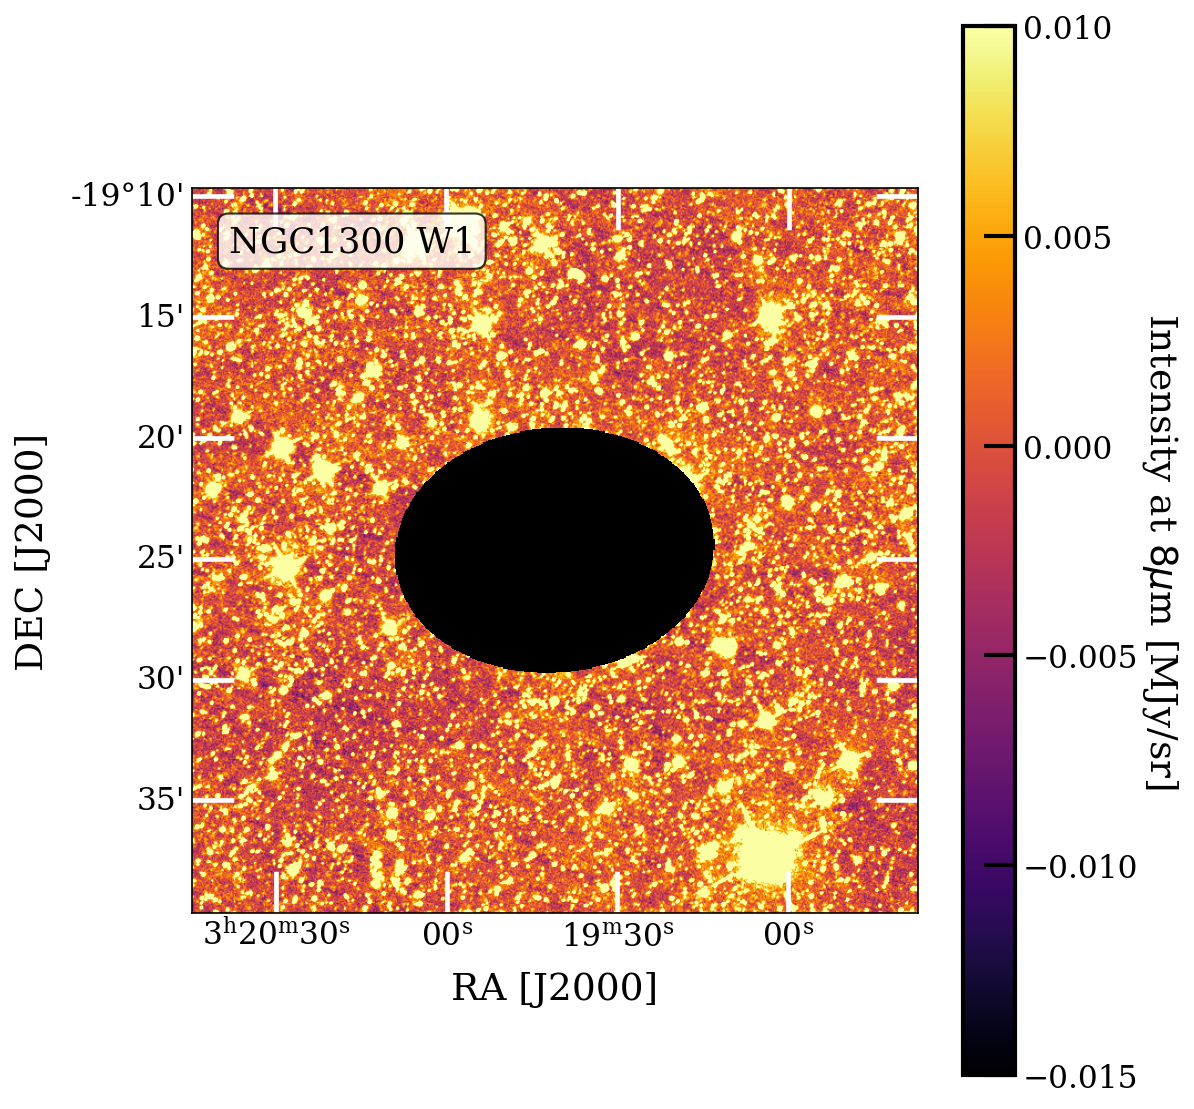

In [16]:
# open fits file
hdu_galaxy = fits.open('/home/austin/PHANGS/ngc1300/ngc1300_w1_mjysr.fits')[0]
hdu_galx = fits.open('/home/austin/PHANGS/ngc1300/'+galaxy.lower()+'_w4_mjysr.fits')[0]
# set up coordinate grid for data in fits file
wcs_im1 = WCS(hdu_galaxy.header)

# start a figure
f = plt.figure(figsize=(8, 8))
# set up a subplot with coordinate information from fits file header
ax = plt.subplot(projection=wcs_im1)

#define mask
mask = r_pc < 50*1e3
galx = hdu_galaxy.data
galx[mask] = np.nan

# display fits image
im = ax.imshow(galx, origin='lower', norm=mpl.colors.Normalize(vmin=-0.015, vmax=0.01), aspect='equal', cmap='inferno', alpha=1)

# everything that comes after this point is to make the figure look prettier; 
# strictly speaking, these aren't necessary
plt.rcParams["font.family"] = "serif"
mpl.rcParams['text.usetex'] = False

f.set_dpi(150)
f.set_facecolor('w')
ax.set_facecolor('k')
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(0.05, 0.95, 'NGC1300 W1', transform=ax.transAxes, fontsize=17,
                verticalalignment='top', bbox=props, zorder=11)
ax.set_xlabel('RA [J2000]', fontsize=18)
ax.set_ylabel('DEC [J2000]', fontsize=18)
ax.tick_params(axis='both', which='major', direction='in', color='white', length=20, width=2, labelsize=15)

# set up colorbar
cmap = mpl.cm.inferno
normalize = mpl.colors.LogNorm(vmin=1e-1, vmax=1e2)
cbar = f.colorbar(im, ax=ax)
cbar.set_label('Intensity at $8 \mu$m [MJy/sr]', rotation=270, fontsize=18, labelpad=20)
cbar.ax.tick_params(direction='in', which='both', labelsize=15)
cbar.ax.tick_params(which='major', length=15, width=2)
cbar.ax.tick_params(which='minor', length=5, width=1)
plt.setp(cbar.ax.spines.values(), linewidth=2)

f.tight_layout()

# mask = (hdu_galaxy.data < 1)
# masked[~mask] = np.nan
# plt.imshow(masked)


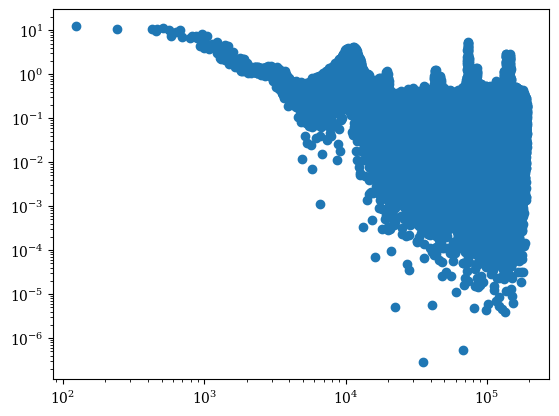

In [26]:
hdu_galx = fits.open('/home/austin/PHANGS/ngc1300/'+galaxy.lower()+'_w4_mjysr.fits')[0]
galx = hdu_galx.data
r_pc = r_deg * (np.pi / 180) * (DIST * 1e6)

plt.scatter(r_pc.flatten() , galx.flatten())
plt.xscale ('log')
plt.yscale ('log')

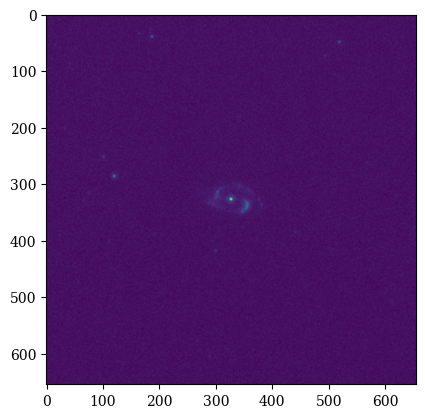

In [25]:
plt.imshow(galx)